<a href="https://colab.research.google.com/github/Radhika190/CAPSTONE-PROJECT-1-Playstore-app-review-data-analysis/blob/main/Individual_Notebook_%7C_playstore_app_data_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Name - Play Store App Review Analysis

Project Type - EDA

Contribution - Individual

# **Project Summary -**


 **The play store app is a digital marketplace operated and managed by Google, where android users can download and install various apps games,music,movies,books and other digital content.the app allows users to browse and search for apps and other digital content and reviews and download them directly.the app also provide a rating system based on a five star scale, allowing users to rate and provide written feedback on their experience with an app.**

**The project objective is to conduct a comprehensive analysis of the Android app market, comparing more than 10,000 apps across various categories in google play store. 
The primary goal of this exploratory data analysis project is to gain a better understanding of customer demand, which can assist developers in popularizing their products on the app store.**

 **In this project I analyze two separate CSV files using Python libraries, such as NumPy,Pandas,Seaborn and Matplotlib which i have learnt from the course.**








# **GitHub Link -**

https://github.com/Radhika190/CAPSTONE-PROJECT-1-Playstore-app-review-data-analysis

# **Problem Statement**




1.   What are the top categories on play store?
2.   What are the Majority of the apps paid or free ?
3.   What is the distribution of rating ?
4.   top 20 apps were installed above 1 billion?
5.   Number of installs based on category ?
6.   Relationship between Rating and Average Reviews ?
7.   Is subjectivity and polarity proportional to each other?
8.   How is price trending across some categories?


#### **Define Your Business Objective?**

Answer Here.

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.

The insights gained from this analysis can help businesses to develop effective app strategies and achieve their objectives on the Play Store. By considering the recommendations provided, businesses can increase their chances of success on the platform by creating apps that are more likely to be downloaded by users.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

### Dataset Loading

In [ ]:
# mounting the drive where data is stored
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load the apps and reviews data into pandas dataframe
df_ps = pd.read_csv('/content/drive/MyDrive/Capstone project google play store analysis/Play Store Data.csv')
df_rev =pd.read_csv('/content/drive/MyDrive/Capstone project google play store analysis/User Reviews.csv')

### Dataset First View

In [ ]:
# look at the first 5 records in the apps dataframe
df_ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# look at the last 5 records in the apps data frame
df_ps.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
# look at the first 5 records in the reviews dataframe
df_rev.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
# look at the last 5 records in the reviews dataframe
df_rev.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
df_ps.shape

(10841, 13)

In the first dataset we observed that we have 10841 rows and 13 coloumns

In [ ]:
df_rev.shape

(64295, 5)

In the second dataset we observed that we have 64295 rows and 5 coloumns

### Dataset Information

In [ ]:
# look at the info of apps dataset
df_ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# look at the info of reviews dataset
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df_ps.duplicated().sum()

483

In [ ]:
df_rev.duplicated().sum()

33616

In [ ]:
play_store_df=df_ps.drop_duplicates(subset='App')
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### Missing Values/Null Values

Null values in play store data.csv

In [ ]:
# check on null values
df_ps.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

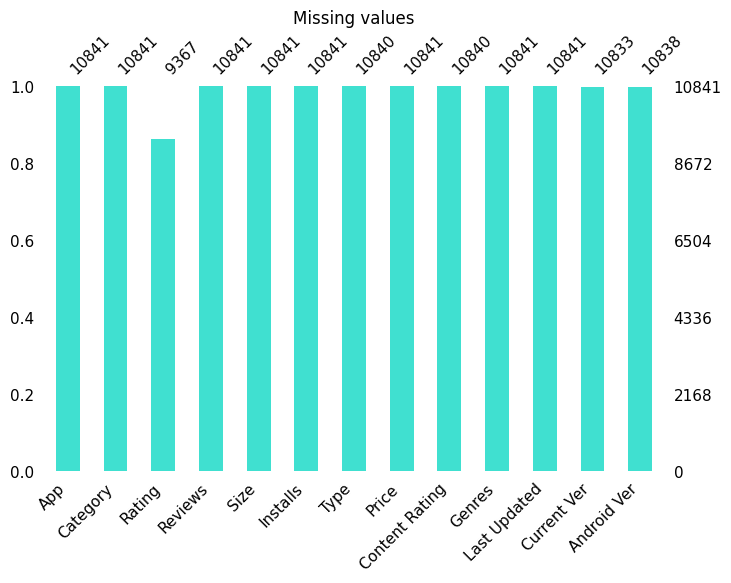

In [ ]:
# Visualizing the missing values in playstore data.csv
msno.bar(df_ps,
         fontsize=11,
         figsize=(8,5),
         color='turquoise')
plt.title('Missing values')
plt.show()

Filling the Null values with the appropriate values using aggregate functions such as Mean,Median,Mode

In [ ]:
# handling null values
def replace_null_value(series):
  '''replace the null values with median 
  median overall rating values
  '''
  return series. fillna(series.median())

df_ps['Rating']=replace_null_value(df_ps['Rating'])
df_ps['Rating']=df_ps['Rating'].astype(float)

In [ ]:
# filling null value with mode of the column 'Type'.
df_ps['Type'].fillna(str(df_ps['Type'].mode().values[0]),inplace=True)

In [ ]:
# filling null value of 'Content Rating' with mode of the column
df_ps['Content Rating'].fillna(str(df_ps['Content Rating'].mode().values[0]),inplace=True)

In [ ]:
# filling null value of 'Current Ver' with mode of the column
df_ps['Current Ver'].fillna(str(df_ps['Current Ver'].mode().values[0]),inplace=True)

In [ ]:
# filling null value of 'Android Ver' with mode of the column
df_ps['Android Ver'].fillna(str(df_ps['Android Ver'].mode().values[0]),inplace=True)

In [ ]:
# Rechecking after filling all these null values
df_ps.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Null values in users review.csv

In [ ]:
# check on null values on 2nd CSV
df_rev.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

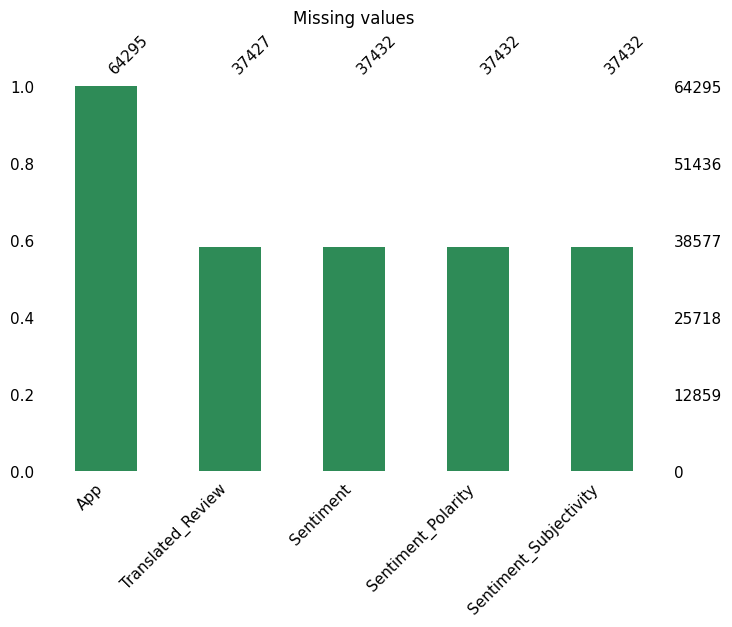

In [ ]:
# Visualizing the missing values in user reviews.csv
msno.bar(df_rev,
         fontsize=11,
         figsize=(8,5),
         color='seagreen')
plt.title('Missing values')
plt.show()

Handling null values 

In [ ]:
# Removing null values of 'Translated_Review ' 
df_rev = df_rev.dropna()

In [ ]:
# Rechecking after removing all these null values
df_rev.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

### What did you know about your dataset?

 By exploring the data frame,we know that:

playstore data.csv contains-


*   There are 13 columns of properties with 10841 rows of data.  
*   columns 'Reviews', 'Size', 'Installs',and 'Price' are in 'object'.


*   values of column 'Size' are strings representing size in 'M' as Megabytes, 'K' as 'Kilobytes' and also varies with devices.
*   value of column 'Installs' are strings representing install amount with symbols such as ',' and '+'.

*  values of column 'price' are strings representing price with symbol '$'.

user reviews.csv contains-



*  100 reviews for each app.
*   most of the data in this CSV is null.












## ***2. Understanding Your Variables***

In [ ]:
# columns of dataset play store data.csv
df_ps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# Dataset Describe
df_ps.describe()

,Rating
count,10841.000000
mean,4.207841
std,0.500893
min,1.000000
25%,4.100000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
# columns of dataset users review.csv
df_rev.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
# dataset describe
df_rev.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


### Variables Description 

*  **App name**: name of the app
*  **Category**: Art_and_design, Book_and_reference, Family and business.

*   **Rating**: the current average rating (out of 5) of the app. 
*  **Review**: no. of people given their review on the app.
* **Size**:size of the app in mb ( MEGABYTES)
* **Installs**: No. of people installed the app from google play store.
* **Type**: wather the app is free or paid.
* **Price**: price is given on the basis of us 4 
* **Content Rating** : it is also known as maturity rating depending upon its suitability to its audience, to show which age group is suitable to view media and entertainment.
* **Genres**: its a kind of a category which particularly says about the app style, form and content for example weather it is artistic, musical or competetive exam or etc.
* **Last update**: date on which it is last updated.
* **Current version**: it means a version of the software that is currently being supported by its publisher.
* **Android version**: it is used to describe the verious updates for the open source android mobile operating system.

### Check Unique Values for each variable.

In [ ]:
# App
df_ps['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [ ]:
# type of category
df_ps['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
# Rating
df_ps['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,  3. ,
        1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,  1.8,
        2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [ ]:
# reviews
df_ps['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
# Size
df_ps['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
# Installs
df_ps['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [ ]:
# type of type
df_ps['Type'].unique()

array(['Free', 'Paid', '0'], dtype=object)

In [ ]:
# Price
df_ps['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [ ]:
# type of content rating
df_ps['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [ ]:
# type of genres
df_ps['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [ ]:
#  Last Update
df_ps['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [ ]:
# Current ver
df_ps['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [ ]:
# Android ver
df_ps['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [ ]:
df_rev.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
# unique values of users review.csv
df_rev['App'].unique()

array(['10 Best Foods for You', '104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室',
       '11st', '1800 Contacts - Lens Store',
       '1LINE – One Line with One Touch',
       '2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif',
       '21-Day Meditation Experience',
       '2Date Dating App, Love and matching',
       '2GIS: directory & navigator', '2RedBeans',
       '2ndLine - Second Phone Number',
       '30 Day Fitness Challenge - Workout at Home',
       '365Scores - Live Scores', '3D Live Neon Weed Launcher',
       '4 in a Row', '4K Wallpapers and Ultra HD Backgrounds',
       '591房屋交易-租屋、中古屋、新建案、實價登錄、別墅透天、公寓套房、捷運、買房賣房行情、房價房貸查詢', '591房屋交易-香港',
       '7 Cups: Anxiety & Stress Chat', '7 Day Food Journal Challenge',
       '7 Minute Workout', '7 Weeks - Habit & Goal Tracker',
       '8 Ball Pool', '850 Sports News Digest',
       '8fit Workouts & Meal Planner', '95Live -SG#1 Live Streaming App',
       'A Call From Santa Claus!', 'A Word A Day',
       'A&E - Watch Full Episodes of TV Shows',
 

In [ ]:
#  unique values of Translated_Review 
df_rev['Translated_Review'].unique()

array(['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"',
       'This help eating healthy exercise regular basis',
       'Works great especially going grocery store', ...,
       'Dumb app, I wanted post property rent give option. Website work. Waste time space phone.',
       'I property business got link SMS happy performance still guys need raise bar guys Cheers',
       'Useless app, I searched flats kondapur, Hyderabad . None number reachable I know flats unavailable would keep posts active'],
      dtype=object)

In [ ]:
#  unique values of Sentiment 
df_rev['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [ ]:
#  unique values of Sentiment_Polarity
df_rev['Sentiment_Polarity'].unique()

array([ 1.        ,  0.25      ,  0.4       , ..., -0.52857143,
       -0.37777778,  0.17333333])

In [ ]:
#  unique values of Sentiment_Subjectivity
df_rev['Sentiment_Subjectivity'].unique()

array([0.53333333, 0.28846154, 0.875     , ..., 0.51145833, 0.7172619 ,
       0.2594697 ])

In [ ]:
df_ps.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,10841.0,4.207841,0.500893,1.0,4.1,4.3,4.5,19.0


**Some data cleaning operation**

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
# rating can't be more than 5 but here is an app which is more than 5
df_ps[df_ps['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


In [ ]:
# removing row  which has false rating rating can't be more than 5
df_ps=df_ps.drop(df_ps.index[[10472]])

In [ ]:
# clean the 'Reviews' data and change the type 'object' to 'float'
reviews = [ i for i in df_ps['Reviews']]
def clean_rev(reviews_list):
  '''
  as 'M' has been found in the Reviews data,
  this function replace it with numeric value of million
  '''
  data_after_cleaning = []
  for review in reviews_list:
    if 'M' in review:
      review = review.replace('M','')
      review = float(review) * 1000000  # 1M = 10,00,000
    data_after_cleaning.append(review)
  return data_after_cleaning

df_ps['Reviews'] = clean_rev(reviews)
df_ps['Reviews'] = df_ps['Reviews'].astype(float)

In [ ]:
# clean the 'Size' data and change the type 'object' to 'float'
# there is a value with 1,000+ in one of record, remove it from data_fame
df_ps['Size'] = df_ps['Size'].apply(lambda x: str(x).replace('Varies with device', '20') if 'Varies with device' in str(x) else x)
df_ps['Size'] = df_ps['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df_ps['Size'] = df_ps['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df_ps['Size'] = df_ps['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
df_ps['Size'] = df_ps['Size'].apply(lambda x: float(x))

In [ ]:
df_ps['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839    20.0
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [ ]:
# clean the 'Installs' data and change the type 'object' to 'float'
df_ps['Installs'] = df_ps['Installs'].str.replace(',','')
df_ps['Installs'] = df_ps['Installs'].str.replace('+','')
df_ps = df_ps.astype({"Installs": int})

<ipython-input-57-bf8d88a5aa07>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_ps['Installs'] = df_ps['Installs'].str.replace('+','')


In [ ]:
# clean the 'price' data and change the type 'object' to 'float
prices = [i for i in df_ps['Price']]

def clean_prices(prices_list):
  data_after_cleaning = []
  for price in prices_list:
    if '$' in price:
       price = price.replace('$','')
    data_after_cleaning.append(price)
  return data_after_cleaning

df_ps['price'] = clean_prices(prices)
df_ps['price'] = df_ps['price'].astype(float)

In [ ]:
df_ps['price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Q.1 Top apps based on category
df=df_ps.groupby('Category')['App'].nunique().reset_index(name="Total Apps")
df=df.sort_values(by=['Total Apps'],ascending=False)
df

,Category,Total Apps
11,FAMILY,1909
14,GAME,960
29,TOOLS,829
4,BUSINESS,420
20,MEDICAL,396
23,PERSONALIZATION,376
25,PRODUCTIVITY,374
18,LIFESTYLE,369
12,FINANCE,345
28,SPORTS,327


In [ ]:
# Q.2 Majority of the apps paid or free
price_df = df_ps[['App','Price','Type','Rating','Size']]
price_df.head()

,App,Price,Type,Rating,Size
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,Free,4.1,19.0
1,Coloring book moana,0,Free,3.9,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,Free,4.7,8.7
3,Sketch - Draw & Paint,0,Free,4.5,25.0
4,Pixel Draw - Number Art Coloring Book,0,Free,4.3,2.8


In [ ]:
# Q.4 top 20 apps were installed above 1 billion
top_installers=df_ps.sort_values(by='Installs', ascending=False)
top_apps_by_instolation=top_installers.head(20)

In [ ]:
top_apps_by_installation=df_ps[["App","Category","Installs"]]
top_apps_by_installation

,App,Category,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,10000
1,Coloring book moana,ART_AND_DESIGN,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,100000
...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,5000
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,100
10838,Parkinson Exercices FR,MEDICAL,1000
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,1000


In [ ]:
top_category_apps=top_apps_by_installation.groupby("Category")["App"].count().reset_index(name="total app")
top_category_apps=top_category_apps.sort_values(by="total app",ascending=False)
top_category_apps

,Category,total app
11,FAMILY,1972
14,GAME,1144
29,TOOLS,843
20,MEDICAL,463
4,BUSINESS,460
25,PRODUCTIVITY,424
23,PERSONALIZATION,392
6,COMMUNICATION,387
28,SPORTS,384
18,LIFESTYLE,382


In [ ]:
# Q.5 Number of installs based on category?
categories= df_ps.groupby('Category')["Installs"].sum().reset_index()
category_installs_sum_df=categories.sort_values(by='Installs', ascending=False)
category_installs_sum_df

,Category,Installs
14,GAME,35086024415
6,COMMUNICATION,32647276251
25,PRODUCTIVITY,14176091369
27,SOCIAL,14069867902
29,TOOLS,11452771915
11,FAMILY,10258263505
24,PHOTOGRAPHY,10088247655
21,NEWS_AND_MAGAZINES,7496317760
30,TRAVEL_AND_LOCAL,6868887146
31,VIDEO_PLAYERS,6222002720


In [ ]:
# Q.6 Relationship between Rating and Average Reviews ?
df_ps.corr()

<ipython-input-66-1c5f6fdaf6d8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_ps.corr()


,Rating,Reviews,Size,Installs,price
Rating,1.000000,0.063166,0.061775,0.045496,-0.019318
Reviews,0.063166,1.000000,0.124102,0.643122,-0.009667
Size,0.061775,0.124102,1.000000,0.076143,-0.022378
Installs,0.045496,0.643122,0.076143,1.000000,-0.011689
price,-0.019318,-0.009667,-0.022378,-0.011689,1.000000


In [ ]:
# Q.7 Is subjectivity and polarity proportional to each other?
df_rev.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [ ]:
# Q.8 How is price trending across some categories?
Apps_with_Highest_rev = df_ps.sort_values(by='Reviews', ascending=False).head(20)
Apps_with_Highest_rev

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,price
2544,Facebook,SOCIAL,4.1,78158306.0,20.0,1000000000,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,0.0
3943,Facebook,SOCIAL,4.1,78128208.0,20.0,1000000000,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,0.0
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,20.0,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,0.0
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,20.0,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,0.0
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,20.0,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,0.0
2604,Instagram,SOCIAL,4.5,66577446.0,20.0,1000000000,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,0.0
2611,Instagram,SOCIAL,4.5,66577313.0,20.0,1000000000,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,0.0
2545,Instagram,SOCIAL,4.5,66577313.0,20.0,1000000000,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,0.0
3909,Instagram,SOCIAL,4.5,66509917.0,20.0,1000000000,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,0.0
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,20.0,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,0.0


### What all manipulations have you done and insights you found?

Answer Here.

I performed several data manipulations on the dataset, including:

* Removed any duplicate rows

* Removed Unnecessasry Columns
* converting 'Ratings' column to numeric data type and dropped the  column which has false rating.

* Converting 'Reviews' column to numeric data types. 

* Converting 'Size' column to numeric data types.

* Converting 'Price' column to numeric data types.

* Converting 'Installs' column to numeric data types.

* Removed rows with null values.

* Converting 'Content Rating' to ordered categorical data type.

* Converting 'Type' to categorical data type.

* Drop rows with missing values in 'Type' and 'Content Rating' columns.

* Renamed the columns for easier Analysis.

* At Last I Reset the index.

I Found Several INSIGHTS including :

* App Categories: The dataset contains apps from 33 different categories. The most popular categories are 'Game' , 'Family' and 'Dating'.

* App Ratings: The average rating for all apps in the dataset is 4.3 out of 5.The minimum rating is 2.5 and the maximum rating is 4.9. The majority of the ratings fall between 3.5 and 4.5.

* App Size: The average app size is 32.8 MB, with a minimum size of 1.2 MB and a maximum size of 99.0 MB.

* App Installs: The average number of installs is 32498880, with a minimum of 1 install and a maximum of over 1 billion installs.

 The majority of the apps have less than 10 million installs.

* App Type: The majority of apps in the dataset are free (98.6%).
The rest are paid apps, with prices ranging from 0.99 to 400.00.

* Prices: The average price of a paid app 13.11, with a minimum price of is 0.99 and a maximum price of $400.00.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

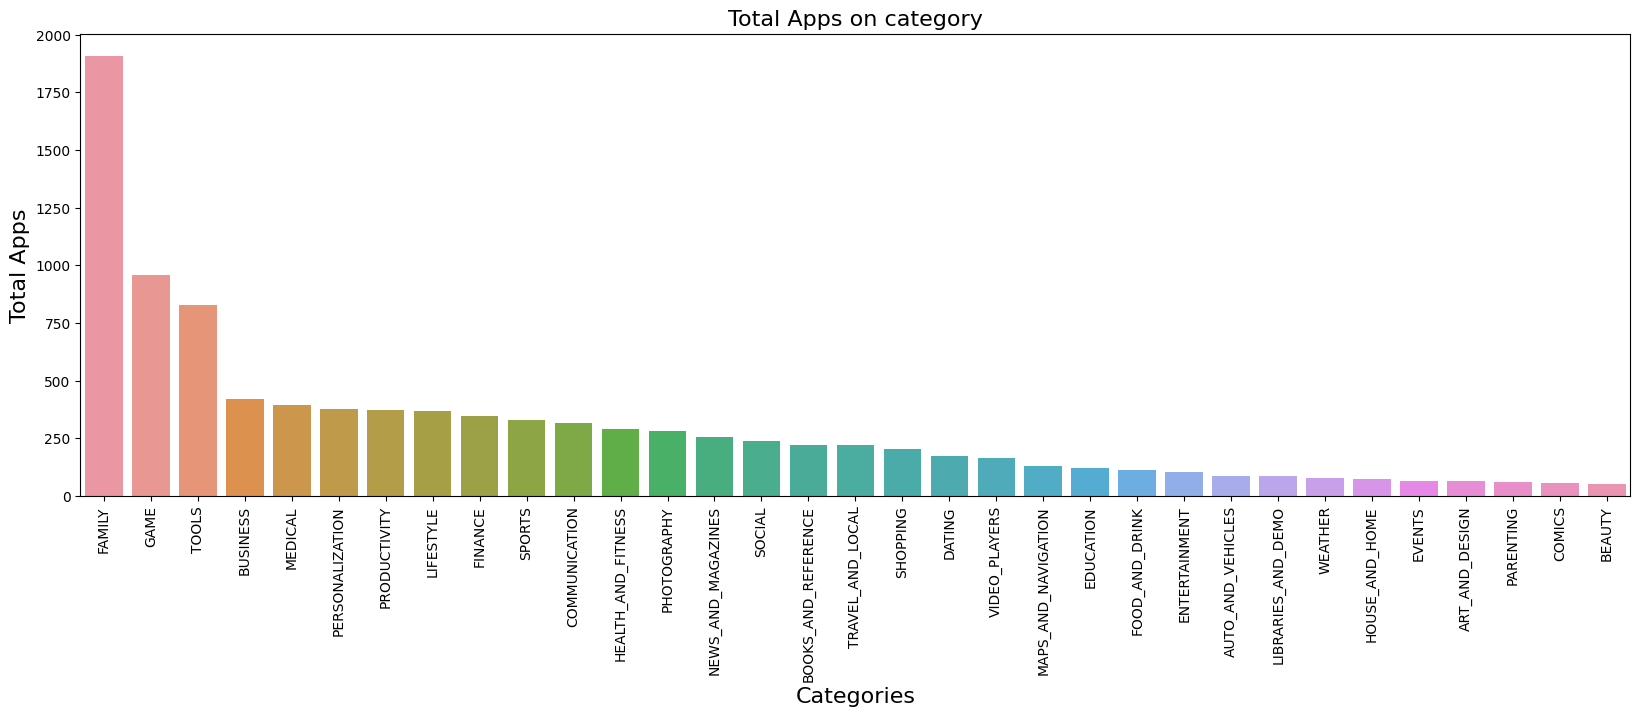

In [ ]:
# Chart - 1 visualization code
# Q.1 top category on play store
plt.figure(figsize=(20,6))
plt.title("Total Apps on category",fontsize=16)
sns.barplot(data=df,x="Category",y="Total Apps")
plt.xticks(rotation= 90)
plt.xlabel('Categories',fontsize=16)
plt.ylabel('Total Apps',fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Bar charts should be used when we are showing segments of information.

So, here I want to show the segment of apps category that's why I chose a bar graph.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From this plotting we know that most of the apps in the play store are from

the categories of 'Family', 'Game' and also 'Tools.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

From this graph we can say that most of the apps are from the category family, game, tools, and beauty, comics category apps are fewer on the play store So it's better to list an app in the category like Beauty, comics, etc.

#### Chart - 2

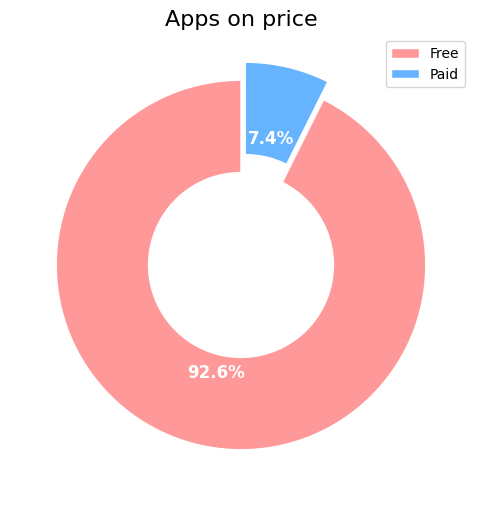

In [ ]:
# Chart - 2 visualization code
# Q.2 Majority of the apps paid or free
colors = ['#ff9999','#66b3ff']
plt.figure(figsize=(8,6))
plt.title("Apps on price",fontsize=16)
plt.pie(price_df.Type.value_counts(), 
        labels=price_df.Type.value_counts().index,
        autopct='%1.1f%%',
        startangle=90,      #explode=(0, 0.1))
        explode=(0, 0.1),
        colors=colors,
        wedgeprops=dict(width=0.5,edgecolor='w'),
        textprops=dict(color="w",fontsize=12,weight='bold'))
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Pie charts are often used in business. Examples include showing percentages of types of customers, percentage of revenue from different products, and profits from different countries.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From the plot we can imply that majority(92.6%) of the apps in the Play Store are Free apps and rest(7.4%) are paid.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

From the above pie chart, we can draw insight that most of the apps are free (approx 92%) and paid apps (approx 7%) Listing. It may lead to fewer installations of paid apps.

#### Chart - 3

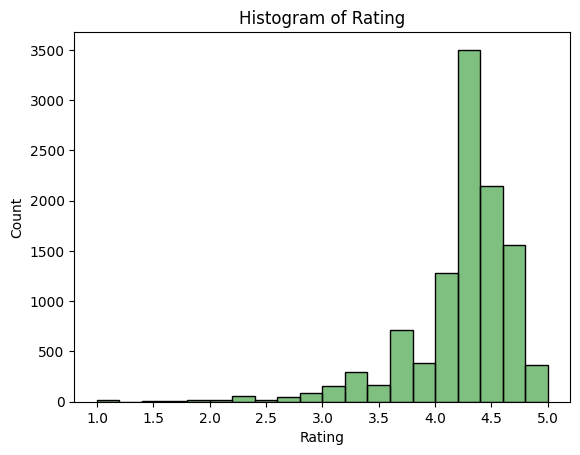

In [ ]:
# Chart - 3 visualization code
# Q.3  What is the distribution of rating ?
sns.histplot(data=df_ps['Rating'],
             color='green',alpha=0.5,
             edgecolor='black',linewidth=1,
             bins=20)
plt.title('Histogram of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Histogram allows us to visualize the frequency of app rating within each range, providing insight into the distribution of app ratings across the dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From this distribution plotting, it implies that most of the apps in the Play Store are having rating higher than 4 or in the range of 4 to 4.7.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

it can be concluded that the majority of apps have a rating between 4 and 4.5. this information could be useful for app developers and businesses as it indicates that creating high quality apps can lead to positive user ratings, which can, in turn , attract more users and drive revenue.

#### Chart - 4

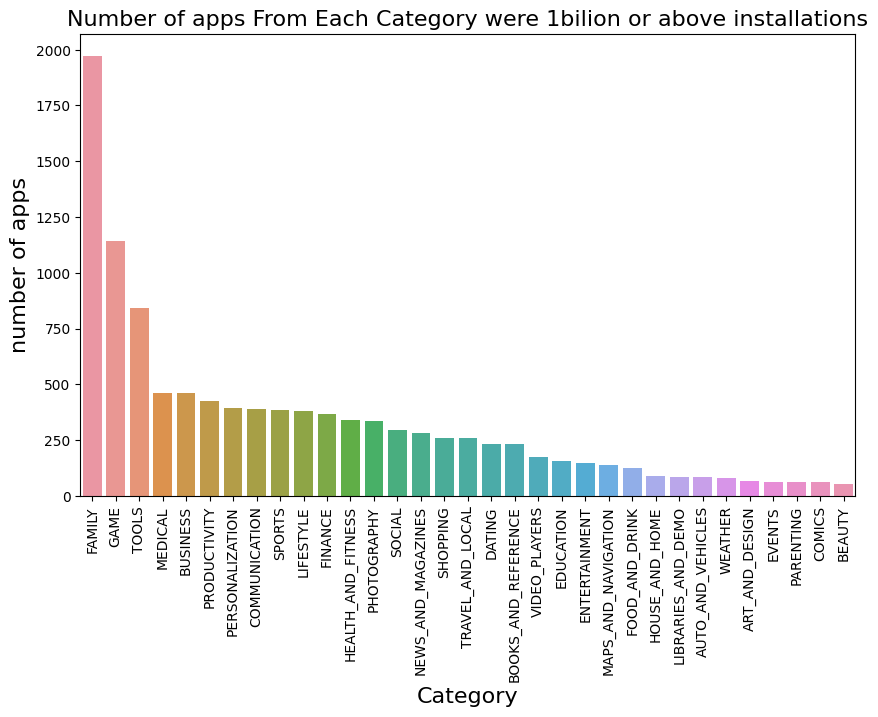

In [ ]:
# Chart - 4 visualization code
# Q.4 top 20 apps were installed above 1 billion
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='total app', data=top_category_apps)
plt.xticks(rotation=90)
plt.xlabel("Category",fontsize=16)
plt.ylabel('number of apps',fontsize=16)
plt.title('Number of apps From Each Category were 1bilion or above installations',fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Bar charts should be used when we are showing segments of information. here i want to show number of apps from each category which are installed above 1 billion.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From plotting this chart i get insights that the top 5 Category of apps which are installed above 1 billon are -
1. Family
2. Games
3. Tools
4. Medical
5. Business

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

From this graph we can say that most of the which are installed above 1 billion are from the category Family, Game, Tools, Medical and Business Category on the play store So it's better to list an app in the category like Family, Game, Tools, Medical and Business.

#### Chart - 5

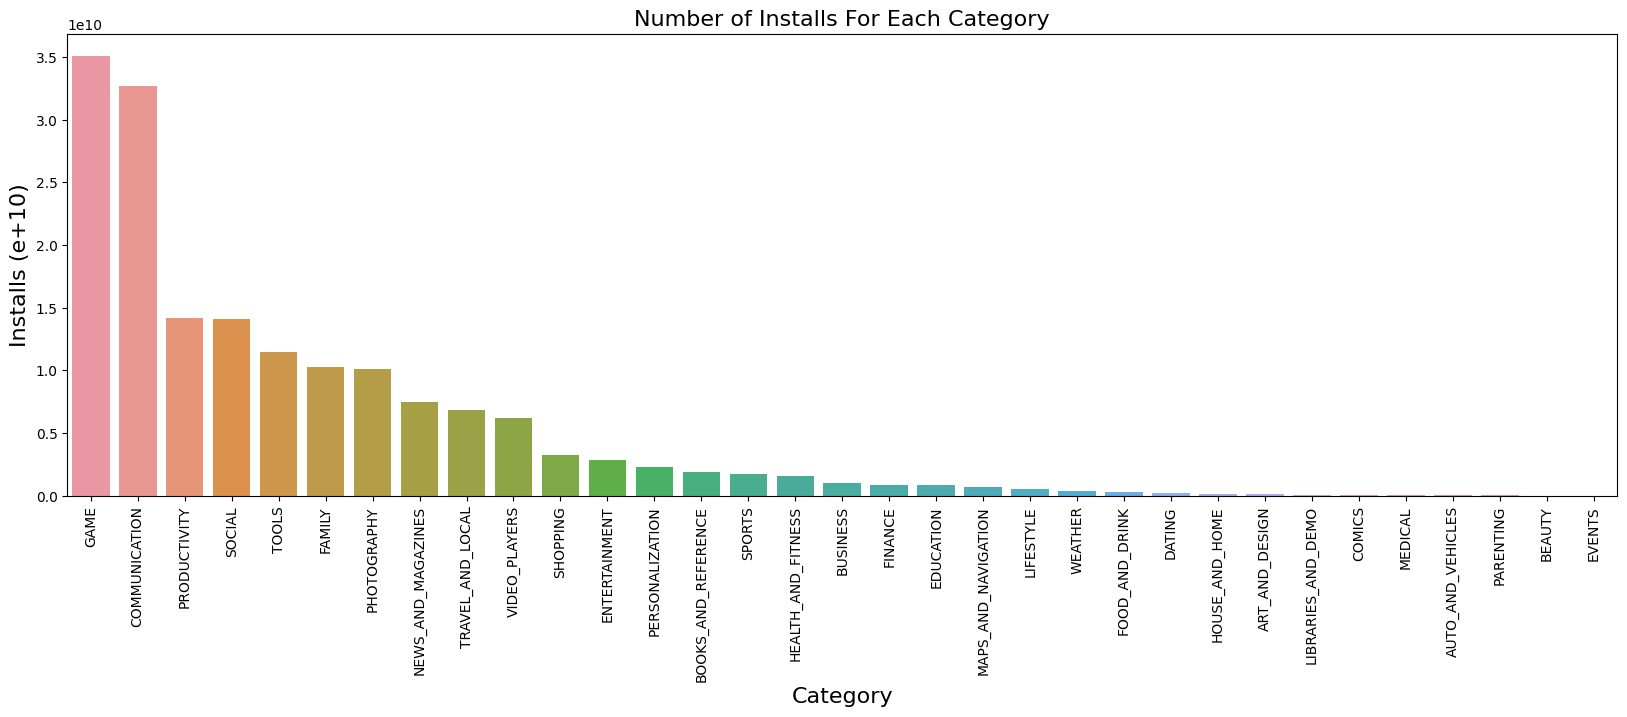

In [ ]:
# Chart - 5 visualization code
# Number of installs based on category ?
plt.figure(figsize=(20, 6))
sns.barplot(x='Category', y='Installs', data=category_installs_sum_df)
plt.xticks(rotation=90)
plt.xlabel("Category",fontsize=16)
plt.ylabel('Installs (e+10)',fontsize=16)
plt.title('Number of Installs For Each Category',fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Bar charts used when we are showing segments of information.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

From this distribution plotting of number of installs for each category, we can see that most of the apps being downloaded and installed are from the categories of 'Game' and 'Communication'.

From the above two plots we can conclude that, maximum number of apps present in google play store comes under Family, Games and Tools Category but as per the installations and requirements in the market place, this is not the case. Maximum installed apps comes under Games, Communication and Tools.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

From the above visualization, we can say that it is profitable to list a game on the play store but in the category like event and beauty it may lead a negative growth of business and apps.

#### Chart - 6 - Correlation Heatmap

<ipython-input-74-e1bdee757f1f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_ps.corr(),annot=True)


<Axes: >

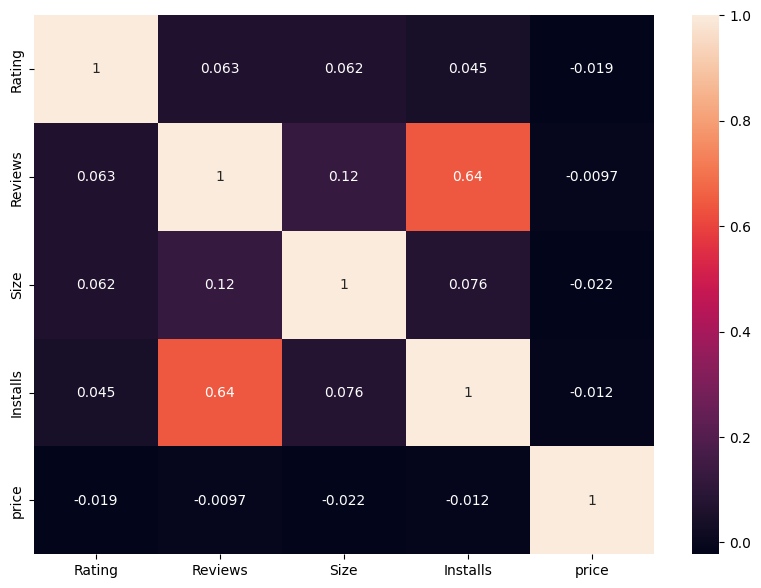

In [ ]:
# Correlation Heatmap visualization code
# Q.6 Relationship between Rating and Average Reviews ?
plt.figure(figsize=(10,7))
sns.heatmap(df_ps.corr(),annot=True)

##### 1. Why did you pick the specific chart?

Answer Here.

Because it makes patterns easily readable and highlights the differences and variations in the same data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

From our heatmap, we can visualize the correlation of the variables. some visualizations from the map are -

1-The correlation between reviews and price is very low

2-The correlation between reviews and installation is very high

3- The moderate correlation variables are price vs rating, rating vs installation

4-The very low correlation between price, reviews, and installs.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.

From the above heatmap, we can say that the correlation between Installation, size, and reviews of the apps gain a positive impact on business, and the relation between price, Installation, and Reviews has a negative or less positive impact on business.

#### Chart - 7

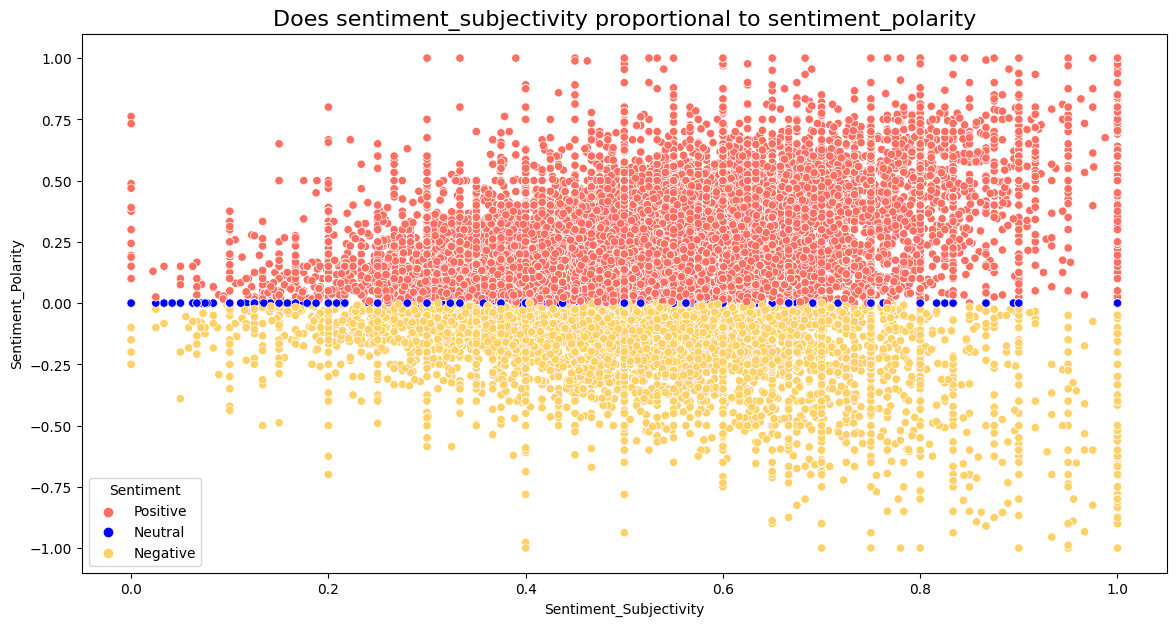

In [ ]:
# Chart - 7 visualization code
#  Q.7 Is subjectivity and polarity proportional to each other?
my_colors = ["#FF6F61","#0000FF","#FFD166"]    
plt.figure(figsize=(14,7))
sns.scatterplot(data=df_rev,x='Sentiment_Subjectivity', y='Sentiment_Polarity',hue="Sentiment",palette=my_colors)
plt.title("Does sentiment_subjectivity proportional to sentiment_polarity",fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Scatter plots are used to plot data points on a horizontal and a vertical axis in an attempt to show how much one variable is affected by another.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.

sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low

#### Chart - 8 

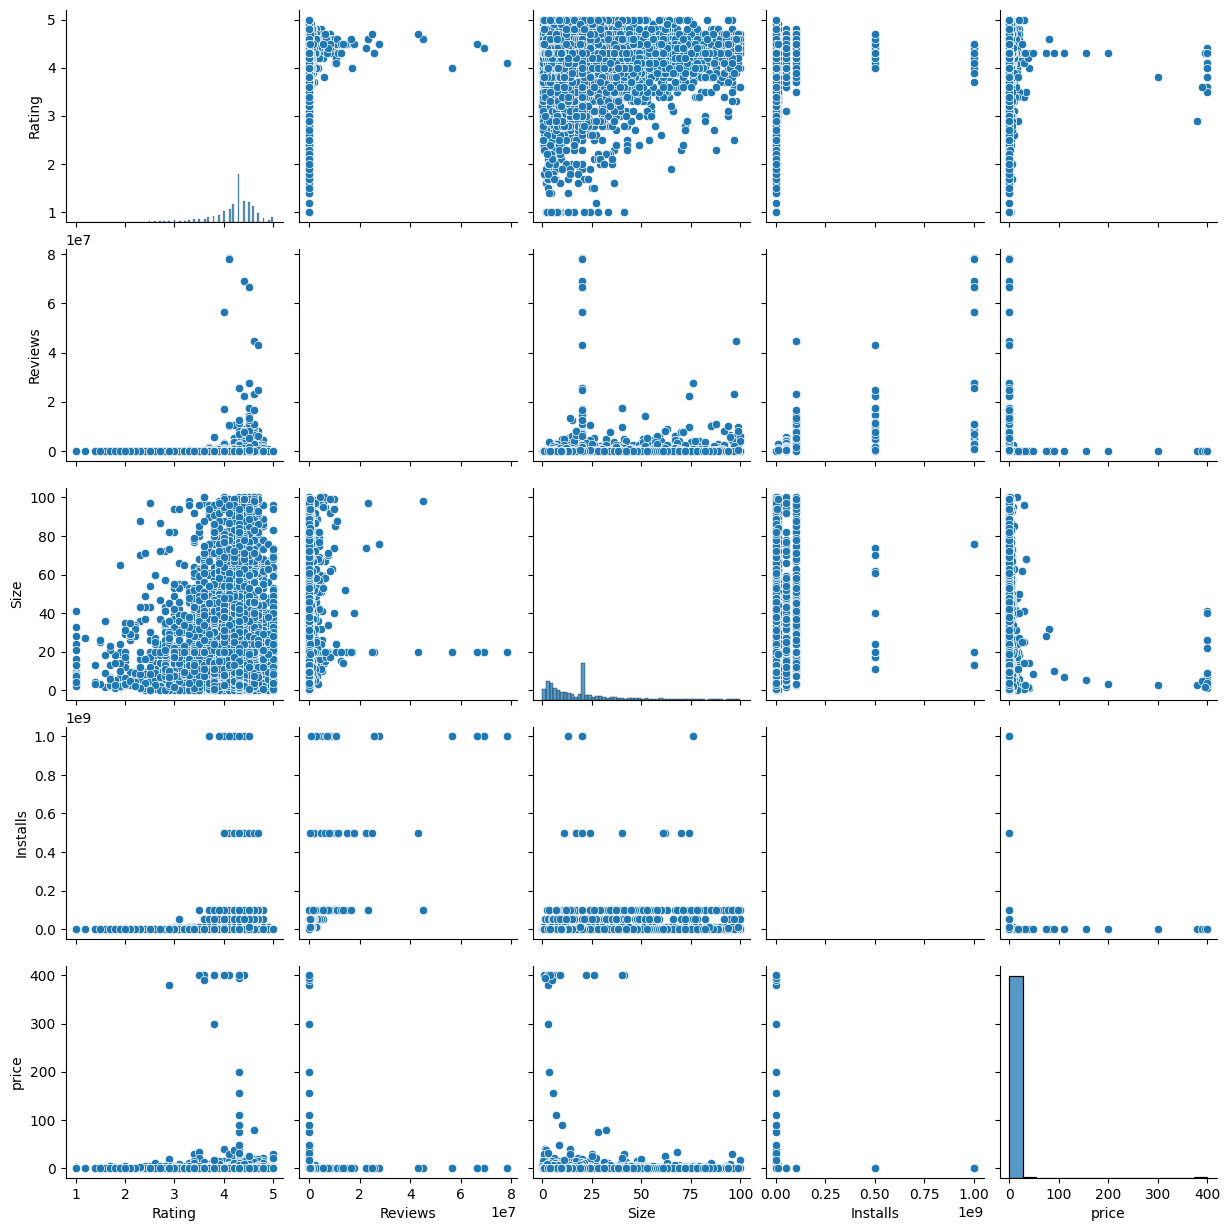

In [ ]:
# visualization code
# Q.8 pairplot on different columns
sns.pairplot(df_ps)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

A pair plot is an excellent visualization tool to understand the pairwise relationships between the variables in the dataset. As we have multiple numerical variables in the Play Store dataset, a pair plot can be used to understand the relationships between them. Therefore, a pair plot is an appropriate chart to use in this scenario.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The pairplot shows the pairwise relationships between various numerical variables in the Play Store dataset. Here are some insights that can be derived from the plot:

* There is a strong positive correlation between the number of installs and the number of reviews.
* There is a weak positive correlation between the size of the app and the number of installs.
* There is a weak positive correlation between the rating of the app and the number of installs.
* There is a weak negative correlation between the price of the app and the number of installs.
* The pairplot also reveals the distribution of each variable, which can be useful in identifying outliers or unusual patterns in the data.
Overall, the pairplot provides a comprehensive view of the relationships between the numerical variables in the dataset and can be helpful in identifying potential patterns and trends.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

* Focus on building apps in the most popular categories, such as Game,Family and Dating. These categories have the highest number of app installs and can potentially generate more revenue.

* Consider offering in-app purchases as a monetization strategy since it shows a positive correlation with app ratings and can generate higher revenue than paid apps.

* Optimize app size to provide a better user experience and potentially

* increase app installs. Apps with smaller sizes tend to have higher ratings and installs.

* Encourage users to leave reviews and ratings, as higher ratings and reviews can lead to more app installs and a higher ranking on the Play Store.

* Continuously update and improve the app to maintain user engagement and satisfaction, which can lead to higher app installs and more revenue.

* Consider expanding the app's availability to other regions and languages, as this can increase the potential user base and generate more revenue.

* By implementing these suggestions, the client can increase their app installs, improve user satisfaction, and generate more revenue, ultimately achieving their business objectives on the Play Store.

# **Conclusion**

The Google play store apps report provides some useful insights regarding the trending of the apps in the play store. As per the graphs visualization shown above, most of the trending apps (in terms of users' installs) are from the categories like GAME, COMMUNICATION and TOOL even though the amount of available apps from these categories are twice as much lesser than the category FAMILY. the trending of these apps are most probably due to their nature of being able to entertain or assist the user. Besides, it also shows a good trend where we can see thet developers from these categories are focusing on the quality instead of the quantity of the apps. 

Here are some points that conclude this:

* The most popular app categories in terms of number of installations are games,news and magzines , family and Productivity .

* Most of the apps are Free, so focusing on free app is more important.

* They need to focus on updating their apps regularly, so that it will attract more users.

* There is a weak correlation between app size and number of installs.

* The average rating of apps is high, around 4.30 out of 5.

* There is a weak positive correlation between app rating and number of reviews.

* There is a weak positive correlation between app rating and number of installs.

* The majority of the apps are aimed at everyone, followed by teenagers and mature audiences.

* There is a weak correlation between app type and app rating.

* There is a weak negative correlation between app size and app rating.

Overall, the insights gained from the analysis can help the client make informed decisions when developing and launching new apps on the Play Store. They can use the insights to identify the most popular categories and user demographics and optimize their app's pricing, size, and rating to attract more users and maximize their installs and revenue.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***